In [1]:
import sys
import json
from pathlib import Path
from torchvision import datasets

In [2]:
project_root = Path.cwd().resolve().parents[2]
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

data_root = project_root / "data"
data_root.mkdir(parents=True, exist_ok=True)

In [3]:
from utils.utils import DEVICE

print(f"Device used: {DEVICE}")

from utils.utils import set_seed

set_seed()

from models.resnet50 import init_model_resnet50
from methods.sisa.sisa_utils import create_sisa_structure
from methods.sisa.sisa_utils import recreate_sisa_dataloaders
import methods.sisa.sisa_train_test as stt
from methods.sisa.sisa_train_test import sisa_train, sisa_test, retrain_sisa_framework
from methods.sisa.sisa_utils import evaluate_aggregated_model, update_sisa_structure

Device used: cuda


In [4]:
BATCH_SIZE = 256
LEARNING_RATE = 5e-5
EPOCHS = 5
SHARDS = 3
SLICES = 5

In [5]:
*_, transform = init_model_resnet50()

Init model...
Done initializing model.
Model ID: 2451830913344, Optimizer ID: 2453223866320, Criterion ID: 2453223866128


In [6]:
train_dataset = datasets.CIFAR10(
    root=data_root, train=True, transform=transform, download=True
)
test_dataset = datasets.CIFAR10(
    root=data_root, train=False, transform=transform, download=True
)

In [13]:
results_path = project_root / "results" / "cifar10" / "sisa"

In [14]:
sisa_structure_file = results_path / "sisa_structure.json"
save_models_metrics_dir = results_path / "sisa_models"

In [15]:
dataloaders, classes = recreate_sisa_dataloaders(
    datasets=(train_dataset, test_dataset),
    info_file_path=sisa_structure_file,
    batch_size=BATCH_SIZE,
    val_ratio=0.1,
)

In [16]:
sisa_test(
    dataloaders=dataloaders,
    saved_models_metrics_dir=save_models_metrics_dir,
    init_model_func=init_model_resnet50,
    clear_solo_models_preds=True,
    results_path=results_path,
)

Init model...
Done initializing model.
Model ID: 2453223866272, Optimizer ID: 2453339437184, Criterion ID: 2453223853216
Loading and testing model: D:\Unlearning\results\cifar10\sisa\sisa_models/shard_0_ResNet50_CIFAR10


Evaluating model: D:\Unlearning\results\cifar10\sisa\sisa_models/shard_0_final_model.pth: 100%|██████████| 40/40 [00:36<00:00,  1.08it/s]


Predictions and labels saved to D:\Unlearning\results\cifar10\sisa\sisa_models/shard_0_ResNet50_CIFAR10_predictions.json
Init model...
Done initializing model.
Model ID: 2453339535440, Optimizer ID: 2453339538864, Criterion ID: 2453339539056
Loading and testing model: D:\Unlearning\results\cifar10\sisa\sisa_models/shard_1_ResNet50_CIFAR10


Evaluating model: D:\Unlearning\results\cifar10\sisa\sisa_models/shard_1_final_model.pth: 100%|██████████| 40/40 [00:36<00:00,  1.10it/s]


Predictions and labels saved to D:\Unlearning\results\cifar10\sisa\sisa_models/shard_1_ResNet50_CIFAR10_predictions.json
Init model...
Done initializing model.
Model ID: 2453339619392, Optimizer ID: 2453224601776, Criterion ID: 2453224596064
Loading and testing model: D:\Unlearning\results\cifar10\sisa\sisa_models/shard_2_ResNet50_CIFAR10


Evaluating model: D:\Unlearning\results\cifar10\sisa\sisa_models/shard_2_final_model.pth: 100%|██████████| 40/40 [00:35<00:00,  1.11it/s]

Predictions and labels saved to D:\Unlearning\results\cifar10\sisa\sisa_models/shard_2_ResNet50_CIFAR10_predictions.json
Evaluation results saved to D:\Unlearning\results\cifar10\sisa\sisa_final_evaluation.json


In [18]:
with open(results_path / "sisa_final_evaluation.json", "r") as f:
    results = json.load(f)

Shard shard_0 Metrics:
  Accuracy: 0.9371
  Precision: 0.9373
  Recall: 0.9371
  F1 Score: 0.9370
Shard shard_1 Metrics:
  Accuracy: 0.9348
  Precision: 0.9346
  Recall: 0.9348
  F1 Score: 0.9345
Shard shard_2 Metrics:
  Accuracy: 0.9389
  Precision: 0.9390
  Recall: 0.9389
  F1 Score: 0.9387

Aggregated Model Metrics:
  Accuracy: 0.9507
  Precision: 0.9508
  Recall: 0.9507
  F1 Score: 0.9506


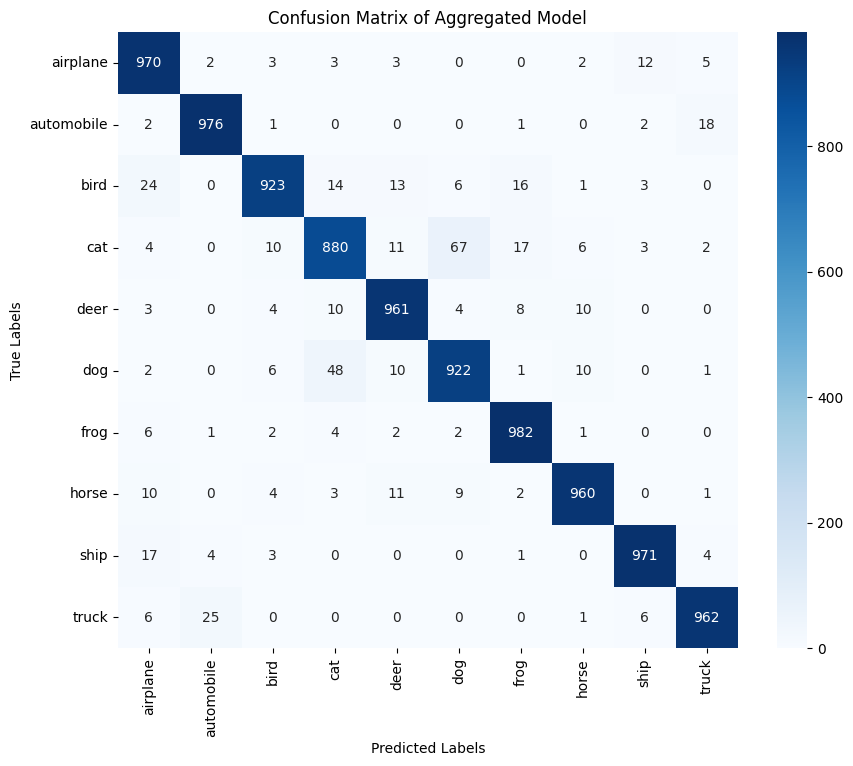

In [19]:
evaluate_aggregated_model(results, classes)

# Unlearning results

In [20]:
sisa_structure = results_path / "sisa_structure.json"
updated_sisa_structure = results_path / "updated_sisa_strucute.json"
deleted_samples = results_path / "deleted_samples.json"

In [21]:
dataloaders, classes = recreate_sisa_dataloaders(
    datasets=(train_dataset, test_dataset),
    info_file_path=updated_sisa_structure,
    batch_size=BATCH_SIZE,
    val_ratio=0.1,
)

In [24]:
save_path = results_path / "sisa_updated_models"

In [25]:
sisa_test(
    dataloaders=dataloaders,
    saved_models_metrics_dir=save_path,
    init_model_func=init_model_resnet50,
    clear_solo_models_preds=True,
    results_path=results_path,
)

Init model...
Done initializing model.
Model ID: 2453345303904, Optimizer ID: 2453343960752, Criterion ID: 2453343960800
Loading and testing model: D:\Unlearning\results\cifar10\sisa\sisa_updated_models/shard_0_ResNet50_CIFAR10


Evaluating model: D:\Unlearning\results\cifar10\sisa\sisa_updated_models/shard_0_final_model.pth: 100%|██████████| 40/40 [00:35<00:00,  1.12it/s]


Predictions and labels saved to D:\Unlearning\results\cifar10\sisa\sisa_updated_models/shard_0_ResNet50_CIFAR10_predictions.json
Init model...
Done initializing model.
Model ID: 2453343960704, Optimizer ID: 2453345191104, Criterion ID: 2453345190864
Loading and testing model: D:\Unlearning\results\cifar10\sisa\sisa_updated_models/shard_1_ResNet50_CIFAR10


Evaluating model: D:\Unlearning\results\cifar10\sisa\sisa_updated_models/shard_1_final_model.pth: 100%|██████████| 40/40 [00:36<00:00,  1.11it/s]


Predictions and labels saved to D:\Unlearning\results\cifar10\sisa\sisa_updated_models/shard_1_ResNet50_CIFAR10_predictions.json
Init model...
Done initializing model.
Model ID: 2453345190096, Optimizer ID: 2453344674736, Criterion ID: 2453344675168
Loading and testing model: D:\Unlearning\results\cifar10\sisa\sisa_updated_models/shard_2_ResNet50_CIFAR10


Evaluating model: D:\Unlearning\results\cifar10\sisa\sisa_updated_models/shard_2_final_model.pth: 100%|██████████| 40/40 [00:36<00:00,  1.11it/s]

Predictions and labels saved to D:\Unlearning\results\cifar10\sisa\sisa_updated_models/shard_2_ResNet50_CIFAR10_predictions.json
Evaluation results saved to D:\Unlearning\results\cifar10\sisa\sisa_final_evaluation.json


In [26]:
with open(results_path / "sisa_final_evaluation.json", "r") as f:
    results = json.load(f)

Shard shard_0 Metrics:
  Accuracy: 0.9237
  Precision: 0.9243
  Recall: 0.9237
  F1 Score: 0.9234
Shard shard_1 Metrics:
  Accuracy: 0.9253
  Precision: 0.9256
  Recall: 0.9253
  F1 Score: 0.9253
Shard shard_2 Metrics:
  Accuracy: 0.9224
  Precision: 0.9220
  Recall: 0.9224
  F1 Score: 0.9220

Aggregated Model Metrics:
  Accuracy: 0.9409
  Precision: 0.9408
  Recall: 0.9409
  F1 Score: 0.9407


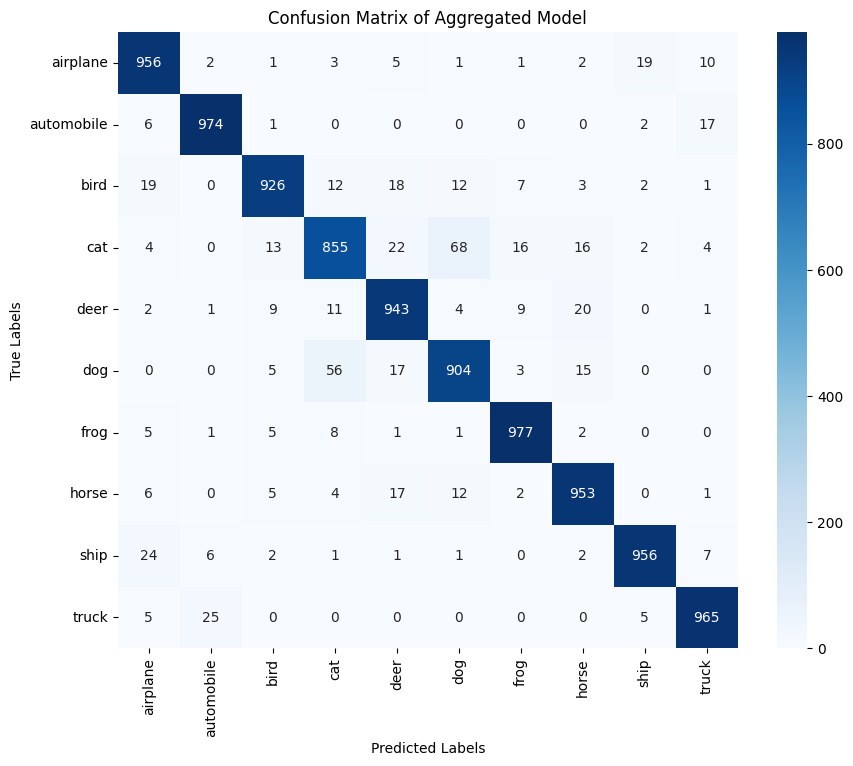

In [27]:
evaluate_aggregated_model(results, classes)